<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

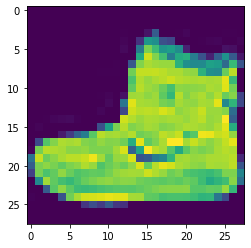

In [4]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5014 - accuracy: 0.8231
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3774 - accuracy: 0.8637
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3360 - accuracy: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3126 - accuracy: 0.8846
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2962 - accuracy: 0.8906


In [9]:
model.evaluate(test_images, test_labels, verbose=0)

[0.3559626847505569, 0.8758]

# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

[1.5080061e-06 2.6825949e-08 2.0377915e-07 4.2296597e-09 9.2806069e-08 2.0434164e-02 4.4952290e-07 2.1272868e-02 4.9742875e-06 9.5828575e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [11]:
print(test_labels[0])

9


In [12]:
print(classifications[0].max())

0.95828575


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels, verbose=0)

classifications = model.predict(test_images)


2.0.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1851
Epoch 2/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0727
Epoch 3/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0490
Epoch 4/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0358
Epoch 5/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0260


In [14]:
print('classification:' + str(classifications[0]))
print('classification max:' + str(np.max(classifications[0])))
print('\n label :' + str(test_labels[0]))

classification:[3.8214396e-10 1.1673949e-11 4.4565579e-10 7.1639397e-07 8.4253054e-15 1.3267800e-09 8.1915181e-14 9.9999893e-01 7.8644358e-10 3.4409300e-07]
classification max:0.9999989

 label :7


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.0.0
Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 1:13

ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [17]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])


model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation ='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.0.0
Train on 60000 samples
Epoch 1/5
   32/60000 [..............................] - ETA: 29:23

InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 4 9 2 2 9 7 3 5 7 7 8 4 6 9 6 7 8 1 9 2 1 8 2 9 1 3 6 5 1 7 3 4
	 [[node loss/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at C:\Users\Amir\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_32820]

Function call stack:
distributed_function


##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [28]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels, verbose=0)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.0.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 201us/sample - loss: 0.1874
Epoch 2/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0821
Epoch 3/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0550
Epoch 4/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0409
Epoch 5/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0334
[1.4765151e-11 3.6518131e-06 1.4896703e-07 2.6158395e-07 2.1723389e-11 6.9423051e-10 1.1816316e-12 9.9999595e-01 3.0895400e-09 1.7745569e-08]
7


#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels, verbose = 0)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.0.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2608
Epoch 2/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1155
Epoch 3/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0802
Epoch 4/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0601
Epoch 5/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0456
Epoch 6/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0360
Epoch 7/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0293
Epoch 8/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0226
Epoch 9/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0193
Epoch 10/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0167
Epoch 11/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0131
E

#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [30]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels, verbose=0)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.0.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1997
Epoch 2/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0808
Epoch 3/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0524
Epoch 4/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0362
Epoch 5/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0284
[3.05442320e-08 8.56981430e-10 1.29251285e-08 8.39056611e-06 6.70975374e-13 9.58557123e-10 3.17841077e-13 9.99987245e-01 1.94704626e-08 4.23967685e-06]
7


#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [31]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.0.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.4734
Epoch 2/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.3577
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 11s 181us/sample - loss: 0.3579
